In [1]:
import cv2

In [2]:
import urllib.request

In [3]:
import numpy as np

In [4]:
import glymur

In [5]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [6]:
%matplotlib inline

In [7]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png') # get the image

In [8]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8) # convert the image to a numpy.ndarray

In [9]:
img = cv2.imdecode(arr,-1) # Decompress the image

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to BGR -> RGB

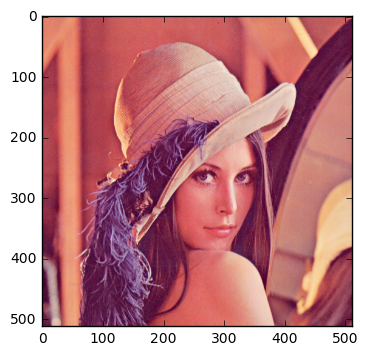

In [11]:
plt.imshow(img)

In [12]:
buf = img.copy() # Create a copy of arr

In [13]:
gaussian = [img] # The base of the gaussian pyramid is buf

In [14]:
# Create the rest of the gaussian pyramid
for i in range(5):
    print(i, len(gaussian), len(gaussian[i]))
    buf = cv2.pyrDown(buf)
    gaussian.append(buf)

0 1 512
1 2 256
2 3 128
3 4 64
4 5 32


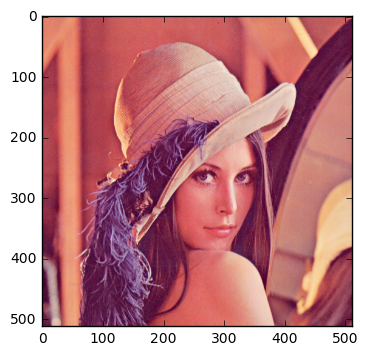

In [15]:
plt.imshow(gaussian[0]);

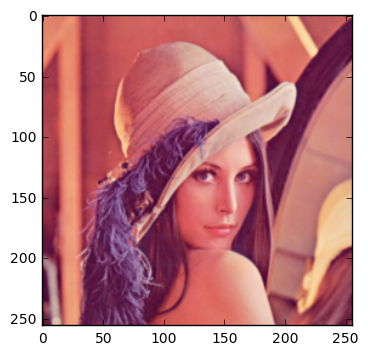

In [16]:
plt.imshow(gaussian[1])

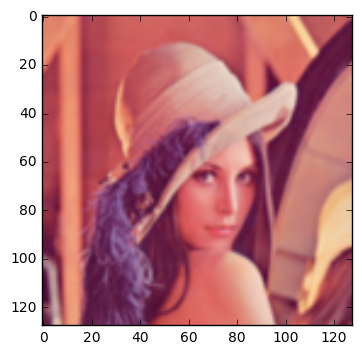

In [17]:
plt.imshow(gaussian[2])

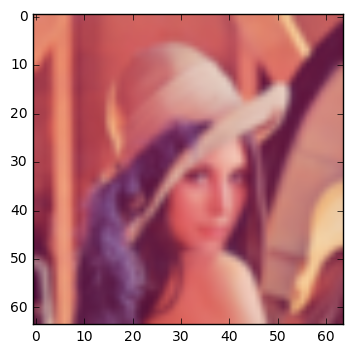

In [18]:
plt.imshow(gaussian[3])

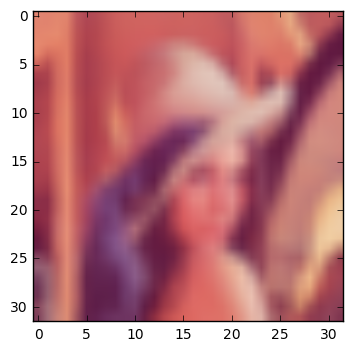

In [19]:
plt.imshow(gaussian[4])

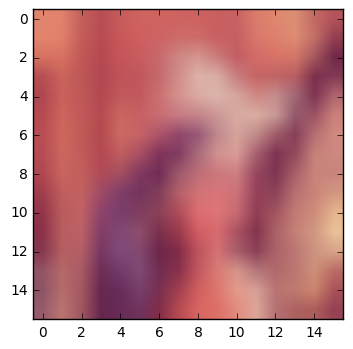

In [20]:
plt.imshow(gaussian[5])

In [21]:
laplacian = [gaussian[5]] # The upper level of the pyramid

In [22]:
# Create the rest of the laplacian pyramid
for i in range(5):
    interpolation = cv2.pyrUp(gaussian[5-i])
    #difference = cv2.subtract(gaussian[5-i-1],interpolation)
    difference = gaussian[5-i-1] - interpolation + 128
    laplacian.append(difference)

In [45]:
print (type(gaussian[5]))

<class 'numpy.ndarray'>


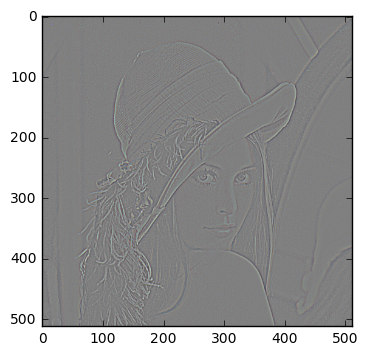

In [24]:
plt.imshow(laplacian[5])

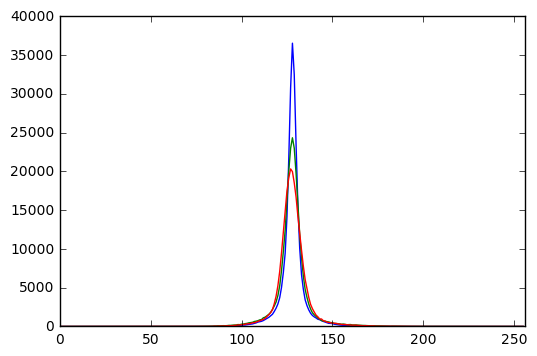

In [25]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([laplacian[5]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

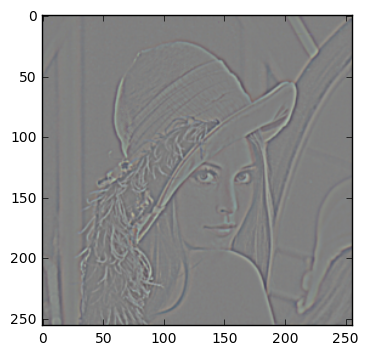

In [26]:
plt.imshow(laplacian[4])

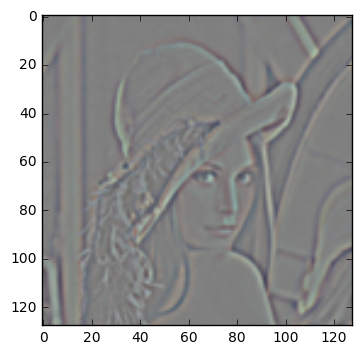

In [27]:
plt.imshow(laplacian[3])

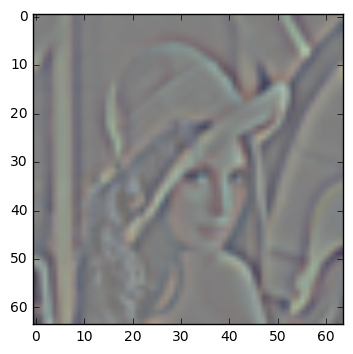

In [28]:
plt.imshow(laplacian[2])

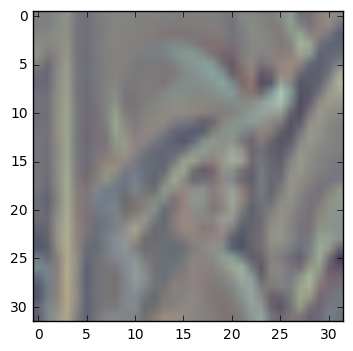

In [29]:
plt.imshow(laplacian[1])

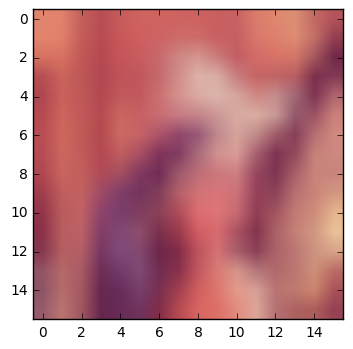

In [30]:
plt.imshow(laplacian[0])

In [31]:
# Reconstruction of the image using the laplacian pyramid
reconstruction = laplacian[0]
for i in range(5):
    reconstruction = cv2.pyrUp(reconstruction)
    reconstruction = reconstruction + laplacian[i+1] - 128
    #reconstruction = cv2.add(reconstruction, np.uint8(laplacian[i+1]/0.5))

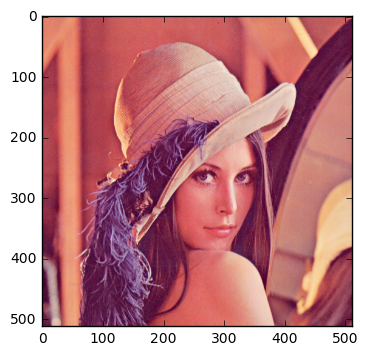

In [32]:
plt.imshow(reconstruction)

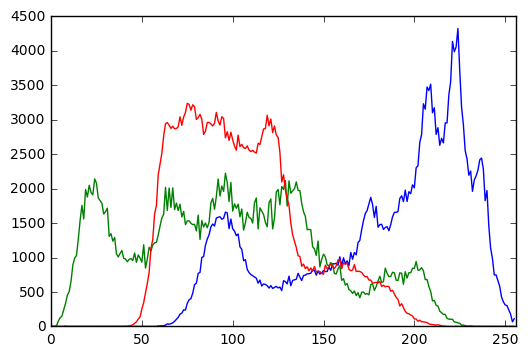

In [33]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([reconstruction],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

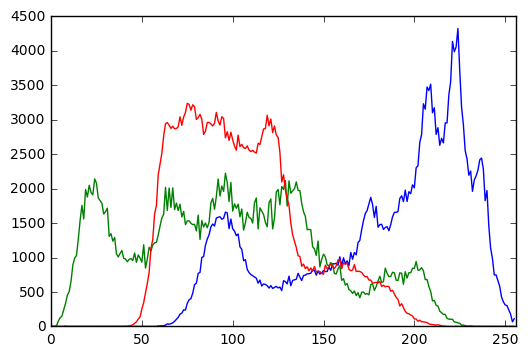

In [34]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [35]:
jp2 = glymur.Jp2k('lena.jp2', data=img)

In [36]:
laplacian[0].shape[1]

16

In [44]:
for i in range(5):
    #jp2 = glymur.jp2box.ImageHeaderBox(laplacian[i+1].shape[0], laplacian[i+1].shape[1], num_components=3, signed=True, bits_per_component=8, compression=7, colorspace_unknown=False, ip_provided=False, length=0, offset=-1)
    jp2 = glymur.Jp2k('laplacian_{}.jp2'.format(i+1), data=laplacian[i+1], numres=1)
    #jp2 = glymur.Jp2k('laplacian_{}.jp2'.format(i+1), mode='wb')
    #jp2.write(laplacian[i+1])
    #print (jp2)